In [0]:

df = spark.read.load('/Volumes/azure_databricks_workspace/default/newvolume/products.csv', 
                     format = 'csv',
                     header = True)

In [0]:
display(df.limit(10))

ProductID,ProductName,Category,ListPrice
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.9900
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.9900
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.9900
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.9900
775,"Mountain-100 Black, 38",Mountain Bikes,3374.9900
776,"Mountain-100 Black, 42",Mountain Bikes,3374.9900
777,"Mountain-100 Black, 44",Mountain Bikes,3374.9900
778,"Mountain-100 Black, 48",Mountain Bikes,3374.9900
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.9900
780,"Mountain-200 Silver, 42",Mountain Bikes,2319.9900


In [0]:
# The following PySpark example shows how to specify a schema for the dataframe to be loaded from a file named product-data.csv in this format

from pyspark.sql.types import *
from pyspark.sql.functions import *

productSchema = StructType([
    StructField("ProductID", IntegerType()),
    StructField("ProductName", StringType()),
    StructField("Category", StringType()),
    StructField("ListPrice", FloatType())
    ])


df = spark.read.load('/Volumes/azure_databricks_workspace/default/newvolume/products.csv',
                     format = 'csv',
                     schema = productSchema,
                     header = False)

display(df.limit(10))

ProductID,ProductName,Category,ListPrice
null,ProductName,Category,null
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.99
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.99
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.99
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.99
775,"Mountain-100 Black, 38",Mountain Bikes,3374.99
776,"Mountain-100 Black, 42",Mountain Bikes,3374.99
777,"Mountain-100 Black, 44",Mountain Bikes,3374.99
778,"Mountain-100 Black, 48",Mountain Bikes,3374.99
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.99


In [0]:
# Filtering and grouping dataframes

pricelist_df = df.select("ProductID", "ListPrice")

In [0]:
display(pricelist_df.head(5))

ProductID,ListPrice
null,null
771,3399.989990234375
772,3399.989990234375
773,3399.989990234375
774,3399.989990234375


In [0]:
bikes_df = df.select("ProductName", "ListPrice").where((df["Category"] == "Road Bikes") | (df["Category"] == "Road Bikes"))

In [0]:
display(bikes_df)

ProductName,ListPrice
"Road-350-W Yellow, 40",1700.99
"Road-350-W Yellow, 42",1700.99
"Road-350-W Yellow, 44",1700.99
"Road-350-W Yellow, 48",1700.99
"Road-750 Black, 58",539.99
"Road-750 Black, 44",539.99
"Road-750 Black, 48",539.99
"Road-750 Black, 52",539.99
"Road-250 Red, 44",2443.35
"Road-250 Red, 48",2443.35


In [0]:
# To group and aggregate data, you can use the groupBy method and aggregate functions. For example, the following PySpark code counts the number of products for each category.

counts_df = df.select("ProductID", "Category").groupBy("Category").count()
display(counts_df)

Category,count
Headsets,3
Wheels,14
Bottom Brackets,3
Touring Frames,18
Mountain Bikes,32
Pedals,7
Derailleurs,2
Chains,1
Pumps,2
Hydration Packs,1


In [0]:
# Using SQL expressions in Spark
# Creating database objects in the Spark catalog

df.createOrReplaceTempView("products")

# A view is temporary, meaning that it's automatically deleted at the end of the current session. You can also create tables that are persisted in the catalog to define a database that can be queried using Spark SQL.

In [0]:
# You can use the Spark SQL API in code written in any language to query data in the catalog. For example, the following PySpark code uses a SQL query to return data from the products view as a dataframe.

bikes_df = spark.sql("SELECT ProductID, ProductName, ListPrice\
                      FROM products \
                      WHERE Category IN ('Mountain Bikes', 'Road Bikes')")

display(bikes_df)

ProductID,ProductName,ListPrice
771,"Mountain-100 Silver, 38",3399.99
772,"Mountain-100 Silver, 42",3399.99
773,"Mountain-100 Silver, 44",3399.99
774,"Mountain-100 Silver, 48",3399.99
775,"Mountain-100 Black, 38",3374.99
776,"Mountain-100 Black, 42",3374.99
777,"Mountain-100 Black, 44",3374.99
778,"Mountain-100 Black, 48",3374.99
779,"Mountain-200 Silver, 38",2319.99
780,"Mountain-200 Silver, 42",2319.99


In [0]:
# The previous example demonstrated how to use the Spark SQL API to embed SQL expressions in Spark code. In a notebook, you can also use the %sql magic to run SQL code that queries objects in the catalog, like shown in the cell below.

In [0]:
%sql 
SELECT Category, COUNT(ProductID) AS ProductCount
FROM products
GROUP BY Category
ORDER BY Category

Category,ProductCount
Bib-Shorts,3
Bike Racks,1
Bike Stands,1
Bottles and Cages,3
Bottom Brackets,3
Brakes,2
Caps,1
Category,0
Chains,1
Cleaners,1


In [0]:
# One of the most intuitive ways to analyze the results of data queries is to visualize them as charts. Notebooks in Azure Databricks provide charting capabilities in the user interface, and when that functionality doesn't provide what you need, you can use one of the many Python graphics libraries to create and display data visualizations in the notebook.

In [0]:
display(df)

ProductID,ProductName,Category,ListPrice
null,ProductName,Category,null
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.99
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.99
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.99
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.99
775,"Mountain-100 Black, 38",Mountain Bikes,3374.99
776,"Mountain-100 Black, 42",Mountain Bikes,3374.99
777,"Mountain-100 Black, 44",Mountain Bikes,3374.99
778,"Mountain-100 Black, 48",Mountain Bikes,3374.99
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.99


Databricks visualization. Run in Databricks to view.

<Figure size 640x480 with 0 Axes>

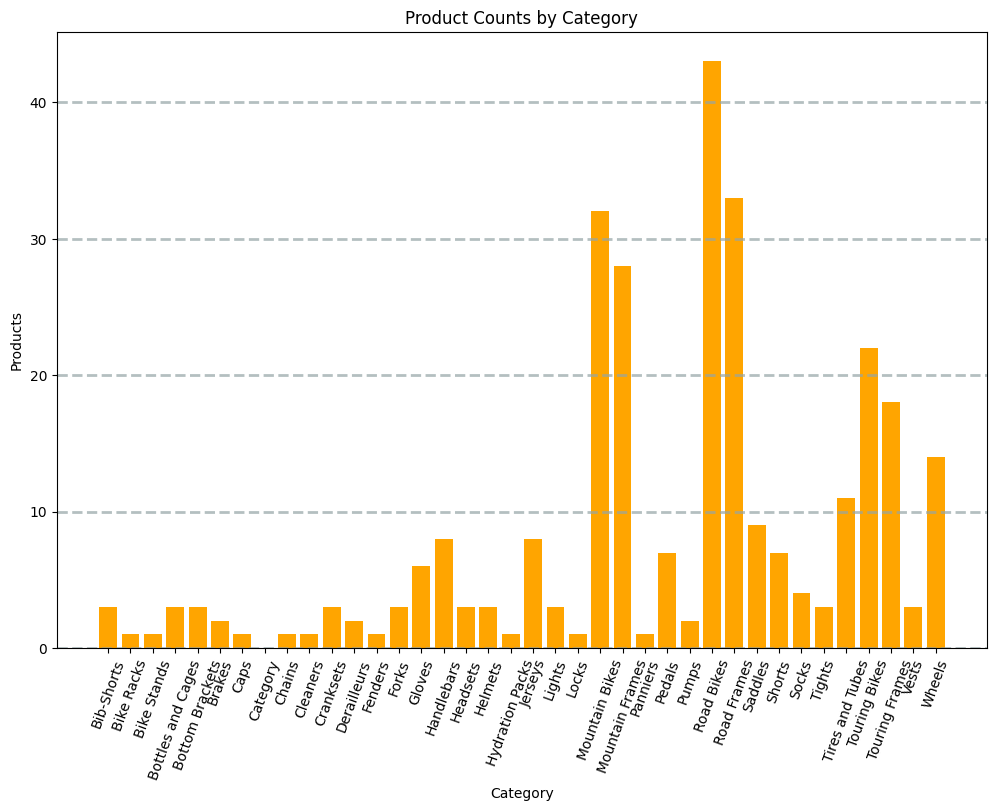

In [0]:
# Using graphics packages in code

from matplotlib import pyplot as plt


# Get the data as the pandas dataframe
data = spark.sql("SELECT Category, COUNT(ProductID) AS ProductCount \
                  FROM products \
                  GROUP BY Category \
                  ORDER BY Category").toPandas()
# The Matplotlib library requires data to be in a Pandas dataframe rather than a Spark dataframe, so the toPandas method is used to convert it.


# Clear the plot area
plt.clf()

# Create a figure
fig = plt.figure(figsize = (12, 8))

# Create a bar plot of product counts by Category
plt.bar(x = data['Category'], height = data['ProductCount'], color = 'orange')

# Customize the chart
plt.title('Product Counts by Category')
plt.xlabel('Category')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation = 70)

# Show the plot
plt.show()